# (SDSS) Predicting star types using photometric measurements

In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

source: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?datasetId=1866141&sortBy=voteCount

## 1. Importing Pandas and getting a glimpse of the data

In [1]:
# import pandas
import pandas as pd
import numpy as np

# import data from kaggle to the directory we are working in
# read data from directory and print first 5 objects (head)
star_classification = pd.read_csv("star_classification.csv")
# we have 100,000 observations and values for all variables which is great
star_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
obj_ID         100000 non-null float64
alpha          100000 non-null float64
delta          100000 non-null float64
u              100000 non-null float64
g              100000 non-null float64
r              100000 non-null float64
i              100000 non-null float64
z              100000 non-null float64
run_ID         100000 non-null int64
rerun_ID       100000 non-null int64
cam_col        100000 non-null int64
field_ID       100000 non-null int64
spec_obj_ID    100000 non-null float64
class          100000 non-null object
redshift       100000 non-null float64
plate          100000 non-null int64
MJD            100000 non-null int64
fiber_ID       100000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 13.7+ MB


In [2]:
# look at the distribution of values in the dataset
star_classification.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


We notice outliers for the u, z and g filters with values of -9999 which should not be allowed (cannot have negative values) so we select this outlier and drop that row from the dataset.

In [3]:
# select the row with u or z or g below 0 (should not be allowed)
outliers = star_classification[(star_classification["u"] <= 0)  
                               | (star_classification["z"] <= 0) 
                               | (star_classification["g"] <= 0)]
outliers
# we notice that it is only one object which was classified as a star

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
79543,1.237649e+18,224.006526,-0.624304,-9999.0,-9999.0,18.1656,18.01675,-9999.0,752,301,2,537,3.731277e+18,STAR,0.000089,3314,54970,162


In [4]:
# drop the row corresponding to the outlier
star_classification = star_classification.drop(outliers.index, axis=0)
# check that we indeed got rid of one row - yes, from 100,000 to 99,999
star_classification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 18 columns):
obj_ID         99999 non-null float64
alpha          99999 non-null float64
delta          99999 non-null float64
u              99999 non-null float64
g              99999 non-null float64
r              99999 non-null float64
i              99999 non-null float64
z              99999 non-null float64
run_ID         99999 non-null int64
rerun_ID       99999 non-null int64
cam_col        99999 non-null int64
field_ID       99999 non-null int64
spec_obj_ID    99999 non-null float64
class          99999 non-null object
redshift       99999 non-null float64
plate          99999 non-null int64
MJD            99999 non-null int64
fiber_ID       99999 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 14.5+ MB


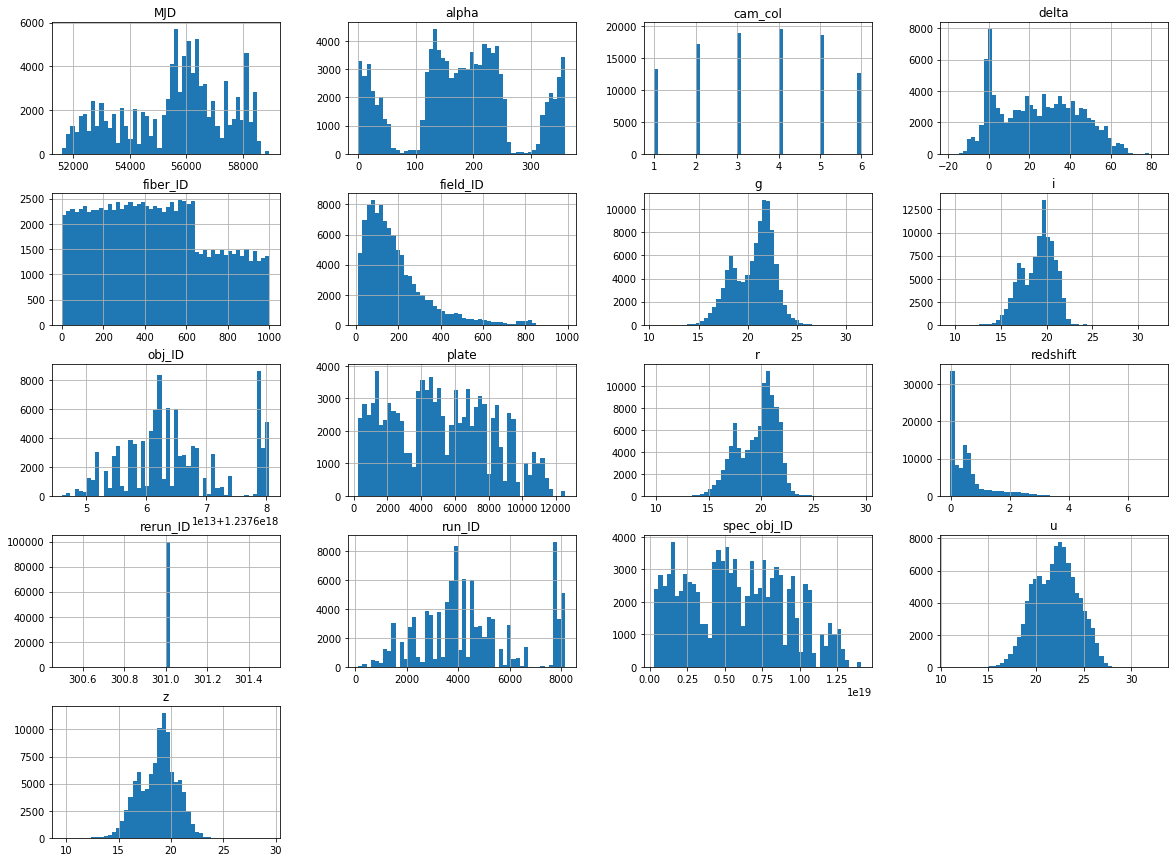

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
# plotting histograms for each column to analyse distribution of data points
star_classification.hist(bins=50, figsize=(20,15))
plt.show()

Let's now create training and testing sets by keeping the spread of categories we have in the overall dataset (see star_classification["class"].value_counts() above).

## 2. Creating training and test sets (stratified train/tes split)

We aim at keeping the same distribution in training and testing sets as we have in the overall dataset. We choose a test size of 20% of the dataset.

GALAXY    59445
STAR      21593
QSO       18961
Name: class, dtype: int64

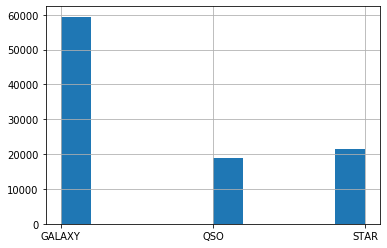

In [6]:
# histogram of different classes
star_classification["class"].hist()
# not an even spread between the different categories, will need to take into account!
star_classification["class"].value_counts()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(star_classification, star_classification["class"]):
    strat_train_set = star_classification.loc[train_index]
    strat_test_set = star_classification.loc[test_index]

# will indicate the proportion of districts in each category
strat_test_set["class"].value_counts() / len(strat_test_set)

C:\Users\ellio\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """


GALAXY    0.59795
STAR      0.21430
QSO       0.18775
Name: class, dtype: float64

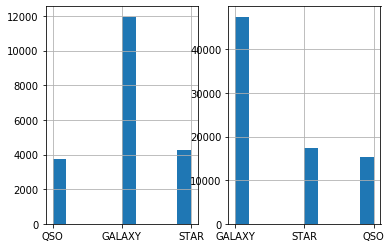

In [8]:
# make sure we keep the same distribution
plt.subplot(1,2,1)
strat_test_set["class"].hist()
plt.subplot(1,2,2)
strat_train_set["class"].hist()

plt.show()

## 3. Manipulating the data

We make a copy of the data set so that we can manipulate it freely and delete any useless information.

In [9]:
# create a copy of the training set to manipulate without harming original
star_classification = strat_train_set.copy()
# we drop the data we are not interested in and which won't be useful
star_classification = star_classification.drop(
    columns=["obj_ID", "fiber_ID", "MJD", "plate", "spec_obj_ID", 
             "field_ID", "cam_col", "rerun_ID", "run_ID"], axis=1)
star_classification

,alpha,delta,u,g,r,i,z,class,redshift
31871,236.886133,25.746372,24.00161,21.22490,19.42473,18.74697,18.36518,GALAXY,0.388266
5421,175.396226,7.414312,18.64321,16.61261,15.60582,15.17248,14.78776,GALAXY,0.088187
81867,330.310510,22.865798,24.78542,24.65894,21.96032,20.77460,19.91515,GALAXY,0.685564
88632,184.534708,6.293682,19.19104,18.05456,17.65642,17.38591,17.28063,GALAXY,0.078282
16810,132.807587,26.488426,23.82002,21.94656,20.20684,19.42892,18.98755,GALAXY,0.431886
...,...,...,...,...,...,...,...,...,...
71002,18.750721,17.875593,24.16069,24.06798,22.36660,20.86997,19.84217,GALAXY,1.414617
84487,217.441998,18.175481,19.19778,17.79148,17.14975,16.81536,16.50878,GALAXY,0.087129
30475,162.331002,40.079474,24.74782,21.97550,20.49869,19.49992,18.99151,GALAXY,0.522292
52498,232.201919,18.045794,18.97042,17.60048,16.88147,16.45545,16.13567,GALAXY,0.085534


In [10]:
df_galaxy = star_classification[star_classification_simple["class"] == "GALAXY"]
df_star = star_classification[star_classification_simple["class"] == "STAR"]
df_QSO = star_classification[star_classification_simple["class"] == "QSO"]

NameError: name 'star_classification_simple' is not defined

array(['GALAXY', 'STAR', 'QSO', nan], dtype=object)

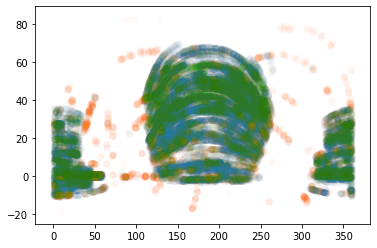

In [11]:
# for each class, select the data and plot it -> allows for different coloured data points
# plot the positions in the sky (right ascension and declination)
for name in star_classification["class"].unique():
    df_temp = star_classification[star_classification["class"] == name]
    plt.scatter(df_temp.alpha.values, df_temp.delta.values, alpha=0.01)

# shows all the unique categories in the "class" column
star_classification["class"].unique()

## 4. Studying correlations

Could be interesting to study the correlation between filter and maybe an interesting regression problem could be to analyse if we can describe a filter as a function of the other filters! Could help solve the issue when you only have the data for some filters and want to extrapolate.

In [12]:
# finding the correlation matrix for our dataset
corr_matrix = star_classification.corr()
# Check correlation of z filter with the rest
corr_matrix["z"].sort_values(ascending=False)

z           1.000000
i           0.971493
r           0.918894
g           0.775569
u           0.546808
redshift    0.501369
delta      -0.004187
alpha      -0.024283
Name: z, dtype: float64

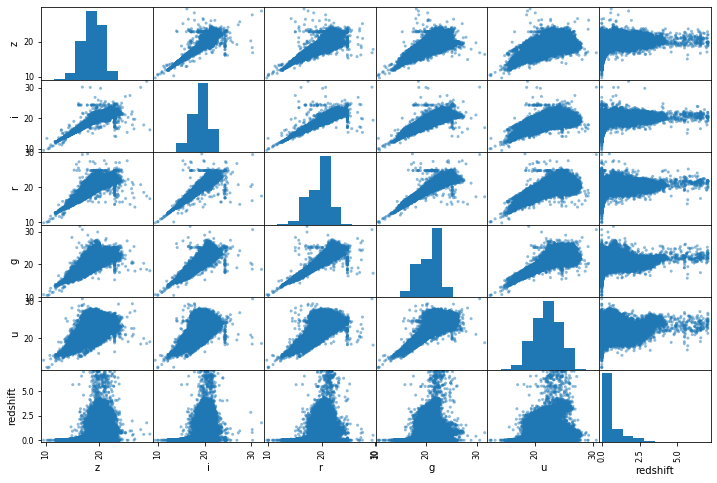

In [13]:
from pandas.plotting import scatter_matrix

# selection of important attributes
attributes = ["z", "i", "r",
              "g", "u", "redshift"]
# output plots of each correlation (6x6 = 36 subplots -> each attribute with one another)
scatter_matrix(star_classification[attributes], figsize=(12, 8));

Notice correlations between all filters but **strong** correlations between z and i, i and r, r and g. We also notice that redshift remains an important attribute and has a relatively strong correlation as is to be expected, with increasing resdshift, we have increasing distance which affects the intensity in filters. As expected as well, increasing redshift shifts the light coming from an object more towards red colours so we expect a bigger correlation with "z"(far infrared), "i" (infrared) and "r" (red).

In [14]:
print("Strong correlations between:"
      "\n z and i: {:.3f}".format(corr_matrix["z"]["i"]), 
      "\n i and r: {:.3f}".format(corr_matrix["i"]["r"]), 
      "\n r and g: {:.3f}".format(corr_matrix["r"]["g"]))

Strong correlations between:
 z and i: 0.971 
 i and r: 0.963 
 r and g: 0.933


In [15]:
print("Increasing correlations for redshift and filters with increasing wavelength:" 
      "\n u: {:.3f}".format(corr_matrix["redshift"]["u"]), 
      "\n g: {:.3f}".format(corr_matrix["redshift"]["g"]),
      "\n r: {:.3f}".format(corr_matrix["redshift"]["r"]), 
      "\n i: {:.3f}".format(corr_matrix["redshift"]["i"]), 
      "\n z: {:.3f}".format(corr_matrix["redshift"]["z"]))

Increasing correlations for redshift and filters with increasing wavelength:
 u: 0.168 
 g: 0.320 
 r: 0.435 
 i: 0.494 
 z: 0.501


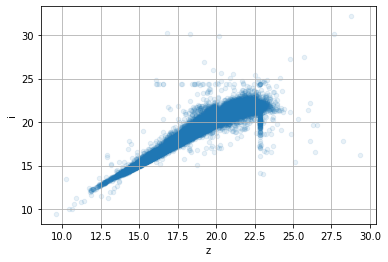

In [16]:
# relation with strongest correlation: z and i filters
star_classification.plot(kind="scatter", x="z", y="i", alpha=0.1)
plt.grid();

Can notice a vertical line around z = 23 and a horizontal line around i = 24.5.

## 5. Preparing binary classifier

Let's try to create and train classifier to identify STARS.

In [57]:
def get_train_test():
    # load
    df = pd.read_csv("star_classification.csv")
    # remove outliers
    # select the row with u or z or g below 0 (should not be allowed)
    outliers = df[(df["u"] <= 0)  
                | (df["z"] <= 0) 
                | (df["g"] <= 0)]

    # drop the row corresponding to the outlier
    df = df.drop(outliers.index, axis=0)
    # we drop the data we are not interested in and which won't be useful
    df = df.drop(
        columns=["obj_ID", "fiber_ID", "MJD", "plate", "spec_obj_ID", 
                 "field_ID", "cam_col", "rerun_ID", "run_ID"], axis=1)
    
    # replace star class with 1s and others with 0
    #df.loc[df['class'] == "STAR", 'class'] = 1
    #df.loc[df['class'] != "STAR", 'class'] = 0
    
    # stratified split
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(df, df["class"]):
        strat_train_set = df.loc[train_index]
        strat_test_set = df.loc[test_index]
        
    return strat_train_set, strat_test_set

In [58]:
train, test = get_train_test()
train = train.reset_index(drop=True)
train

C:\Users\ellio\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


,alpha,delta,u,g,r,i,z,class,redshift
0,236.886133,25.746372,24.00161,21.22490,19.42473,18.74697,18.36518,GALAXY,0.388266
1,175.396226,7.414312,18.64321,16.61261,15.60582,15.17248,14.78776,GALAXY,0.088187
2,330.310510,22.865798,24.78542,24.65894,21.96032,20.77460,19.91515,GALAXY,0.685564
3,184.534708,6.293682,19.19104,18.05456,17.65642,17.38591,17.28063,GALAXY,0.078282
4,132.807587,26.488426,23.82002,21.94656,20.20684,19.42892,18.98755,GALAXY,0.431886
...,...,...,...,...,...,...,...,...,...
79994,18.750721,17.875593,24.16069,24.06798,22.36660,20.86997,19.84217,GALAXY,1.414617
79995,217.441998,18.175481,19.19778,17.79148,17.14975,16.81536,16.50878,GALAXY,0.087129
79996,162.331002,40.079474,24.74782,21.97550,20.49869,19.49992,18.99151,GALAXY,0.522292
79997,232.201919,18.045794,18.97042,17.60048,16.88147,16.45545,16.13567,GALAXY,0.085534


In [130]:
# Stochastic Gradient Descent classifier -> train on dataset
from sklearn.linear_model import SGDClassifier

# seperate measurements (x) with class(y)
x_train = train.drop(columns=["class"], axis=1)
y_train = train["class"]

# replace all infinite values with NaN
x_train = x_train.replace([np.inf, -np.inf], np.nan)
y_train = y_train.replace([np.inf, -np.inf], np.nan)

# drop all the rows with NaN
x_train = x_train.dropna(axis=0)
y_train = y_train.dropna(axis=0)

In [131]:
y_train_star = (y == "STAR")

# fit to training set
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_star)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Example with randomly selected object from the training dataset, comparing its given class with the prediction made by the model.

In [132]:
# try model on random object of the dataset
import random
rand_index = random.randrange(0,len(x_train),1)
print(y_train[rand_index])
some_object = x_train.loc[x_train.index == rand_index]
some_object

GALAXY


,alpha,delta,u,g,r,i,z,redshift
11525,246.751295,22.999577,25.87847,23.11121,21.60202,20.44525,19.9655,0.617045


In [133]:
# our model predicts:
sgd_clf.predict(some_object)

array([False])

## 6. Confusion matrix with star binary classifier

we're not using the test set, we will use the cross_val_predict function (cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold)

**Confusion matrix**
- each column = predicted class
- each row = actual class

The first row of this matrix considers non-star images (the negative class): 56,435 of them were correctly classified as non-stars (they are called true negatives), while the remaining 6,256 were wrongly classified as stars (false positives). 

The second row considers the images of stars (the positive class): 5,958 were wrongly classified as non-stars (false negatives), while the remaining 11,349 were correctly classified as stars (true positives).

In [135]:
from sklearn.model_selection import cross_val_predict

# cross validation
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_star, cv=3)

# confusion matrix (for binary classifier, non-star vs star)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_star, y_train_pred)

array([[56435,  6256],
       [ 5958, 11349]], dtype=int64)

Calculating:
1. Precision:
$$precision = \frac{TP}{TP+FP}$$
2. Recall:
$$recall = \frac{TP}{TP+FN}$$
3. F1 score:
$$F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}}$$

In [139]:
from sklearn.metrics import precision_score, recall_score
print("Precision of the model:", precision_score(y_train_star, y_train_pred))
print("Recall of the model:", recall_score(y_train_star, y_train_pred))

from sklearn.metrics import f1_score
print("F1 score of the model", f1_score(y_train_star, y_train_pred))

Precision of the model: 0.6446464072706617
Recall of the model: 0.655746229849194
F1 score of the model 0.6501489459211733


We will try to fine-tune the model: vary the threshold of the decision function to optimise the F1 score of our binary model.

In [140]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_star, cv=3,
                             method="decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_star, y_scores)

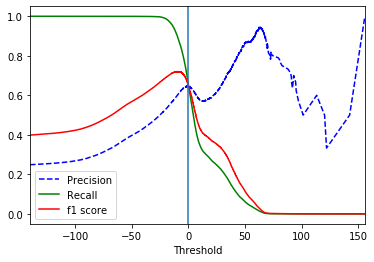

The maximum f1 score is: 0.7200110685790713 located at a threshold of  [-9.84963995]


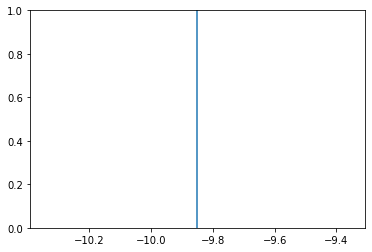

In [173]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    f1_score = 2/(1/precisions[:-1] + 1/recalls[:-1])
    plt.plot(thresholds, f1_score, "r-", label="f1 score")
    plt.axvline(x = 0)
    plt.xlim(thresholds.min(), thresholds.max())
    plt.legend()
    plt.xlabel("Threshold")
    # highlight the threshold and add the legend, axis label, and grid

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

n=0
f1_score_array = np.array([])
for value in thresholds:
    f1_score_array = np.append(f1_score_array, [2/(1/precisions[n] + 1/recalls[n])])
    n=n+1

max_f1 = np.max(f1_score_array)
max_f1_threshold = thresholds[np.where(f1_score_array == max_f1)]
print("The maximum f1 score is:", max_f1, "located at a threshold of ", max_f1_threshold)

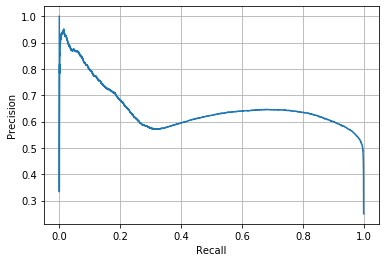

In [144]:
# can also plot precision vs recall!!
plt.plot(recalls, precisions)
plt.grid()
plt.xlabel("Recall")
plt.ylabel("Precision");

We notice that between 0.4 and 0.9 recall, the precision does not change much. We could try maximising the f1 score like such.